# 보이스피싱, 이대로 막을 수 없나?
- 데이터 수집/처리/분석

- ■ 평균 피해금액 분석

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib import font_manager, rc
from bs4 import BeautifulSoup 
import seaborn as sns

font_path = 'C:/Windows/Fonts/malgunsl.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [23]:
df = pd.read_excel('data/fishingmoneydata.xlsx')
howmuch = df[['성별', '피해범위', '등록년월']]
howmuch.head()
# df.head()

,성별,피해범위,등록년월
0,남자,1백 미만,202205
1,남자,1백 미만,202205
2,여자,1백 미만,202205
3,여자,1백 미만,202205
4,여자,1백 미만,202205


In [6]:
len(howmuch)

195288

In [24]:
len(howmuch['피해범위'].unique())

6

In [13]:
type(howmuch)

pandas.core.frame.DataFrame

'''
피해금액 구간 피해현황 출력

1) 금액구간별 데이터 추출??
2) 월별 데이터 추출
3) 남녀 데이터 추출
'''

In [25]:
howmuch['피해범위'].value_counts()

1백 미만    174524
1백~5백     15608
1천~5천      2656
5백~1천      2136
5천~1억       348
1억 이상        16
Name: 피해범위, dtype: int64

In [ ]:
'''
피해범위 파이차트 시각화 vs 막대차트
'''

In [49]:
t  = [0,1,2,3,4,5]
y1 = [174524, 15608, 2136, 2656, 348, 16]

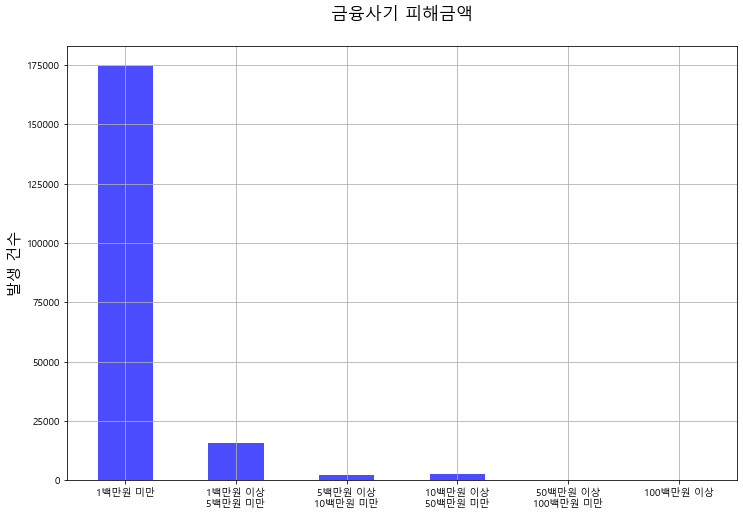

In [93]:
#1백만원 미만의 건수가 다수임을 알 수 있다.

plt.figure(figsize=(12,8))

plt.bar(t, y1, color='b', width=0.5, alpha=0.7)

plt.grid()
plt.title('금융사기 피해금액\n', fontsize=17)
plt.ylabel('발생 건수',fontsize=15)

plt.xticks(t, ('1백만원 미만', '1백만원 이상\n5백만원 미만', '5백만원 이상\n10백만원 미만',
               '10백만원 이상\n50백만원 미만', '50백만원 이상\n100백만원 미만', '100백만원 이상'))
plt.show()

In [14]:
howmuch['성별'].value_counts()

남자    134599
여자     60689
Name: 성별, dtype: int64

In [81]:
sex = ['남자','여자']
y2  = [134599, 60689]

In [90]:
#남자 피해건수가 다수임을 알 수 있다.

# plt.figure(figsize=(8, 6))

# plt.bar(sex, y2, color='r', width=0.1, alpha=0.5)

# plt.grid()
# plt.title('금융사기 피해현황 \n', fontsize=17)
# plt.xlabel('성별',fontsize=15)
# plt.ylabel('발생 건수',fontsize=15)

# plt.xticks(sex, ('남자','여자'))
# plt.show()

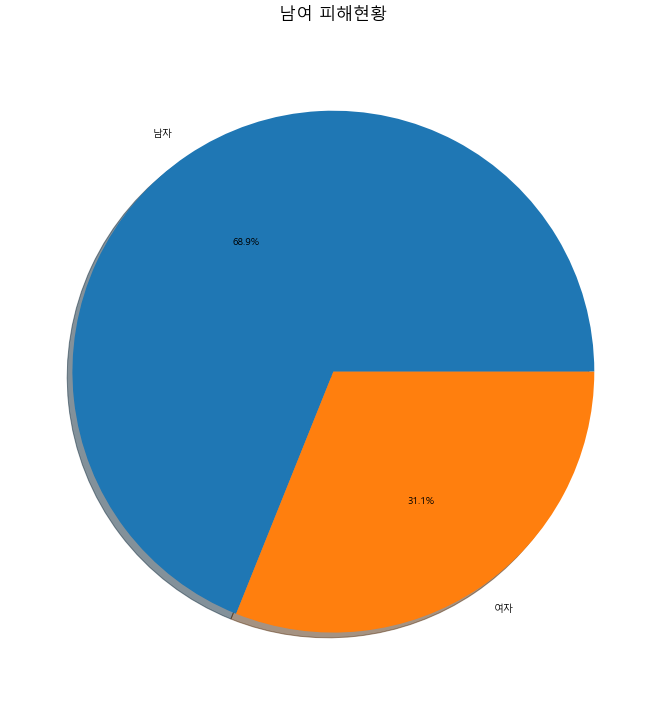

In [111]:
# 남녀 파이차트 시각화
plt.figure(figsize=(12, 12))
plt.title('남여 피해현황\n', fontsize=17)
plt.pie(y2, labels= sex, autopct='%1.1f%%',shadow = True)
plt.show()

In [71]:
howmuch['등록년월'].value_counts()

202203    19690
202202    18428
202205    17668
202201    17324
202204    16100
202110    15839
202108    15794
202107    15593
202112    15075
202109    14940
202106    14458
202111    14379
Name: 등록년월, dtype: int64

In [73]:
month = [0,1,2,3,4,5,6,7,8,9,10,11]
y3    = [14458, 15593, 15794, 14940, 15839, 14379, 15075, 17324, 18428, 19690, 16100, 17668]

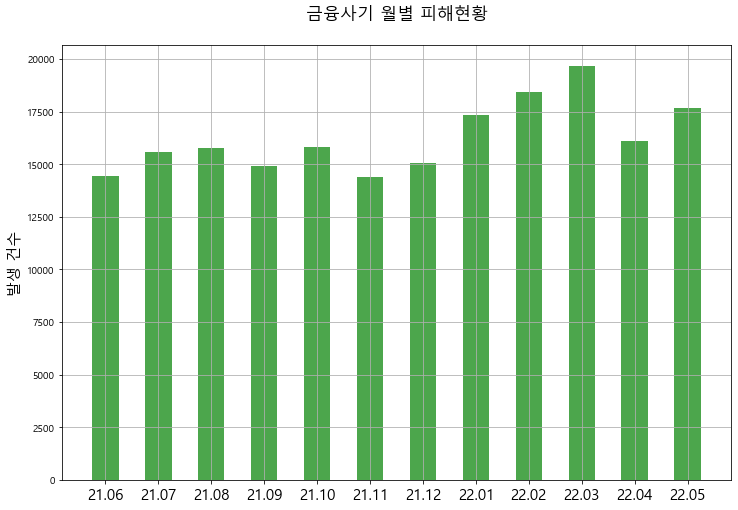

In [92]:
#22.3 > 22.02 > 22.05 > 22.01 순

plt.figure(figsize=(12,8))

plt.bar(month, y3, color='g', width=0.5, alpha=0.7)

plt.grid()
plt.title('금융사기 월별 피해현황\n', fontsize=17)
plt.ylabel('발생 건수',fontsize=15)

plt.xticks(month, ('21.06', '21.07', '21.08', '21.09','21.10','21.11','21.12','22.01','22.02','22.03','22.04','22.05'), fontsize=15)
plt.show()

In [97]:
# 피해금액 구간별
t  = [0,1,2,3,4,5]
y1 = [174524, 15608, 2136, 2656, 348, 16]

# 성별
sex = ['남자','여자']
y2  = [134599, 60689]

# 월별
month = [0,1,2,3,4,5,6,7,8,9,10,11]
y3    = [14458, 15593, 15794, 14940, 15839, 14379, 15075, 17324, 18428, 19690, 16100, 17668]

In [112]:
# 한페이지
def draw_barplot(param='money'):
    
    if param == 'money':        
#         plt.figure(figsize=(12,8))

        plt.bar(t, y1, color='b', width=0.5, alpha=0.7)
        plt.grid()
        plt.title('금융사기 피해금액\n', fontsize=17)
        plt.ylabel('발생 건수',fontsize=15)
        plt.xticks(t, ('1백만원 미만', '1백만원 이상\n5백만원 미만', '5백만원 이상\n10백만원 미만',
                       '10백만원 이상\n50백만원 미만', '50백만원 이상\n100백만원 미만', '100백만원 이상'))
    
    else:
#         plt.figure(figsize=(12,8))

        plt.bar(month, y3, color='g', width=0.5, alpha=0.7)
        plt.grid()
        plt.title('금융사기 월별 피해현황\n', fontsize=17)
        plt.ylabel('발생 건수',fontsize=15)
        plt.xticks(month, ('21.06', '21.07', '21.08', '21.09','21.10','21.11','21.12',
                           '22.01','22.02','22.03','22.04','22.05'), fontsize=15)

def draw_pieplot(param):
    if param == 'sex':
#         plt.figure(figsize=(12, 12))
        plt.title('남여 피해현황\n', fontsize=17)
        plt.pie(y2, labels= sex, autopct='%1.1f%%',shadow = True)
        
    else :
        print("Not Operation !!")
        return

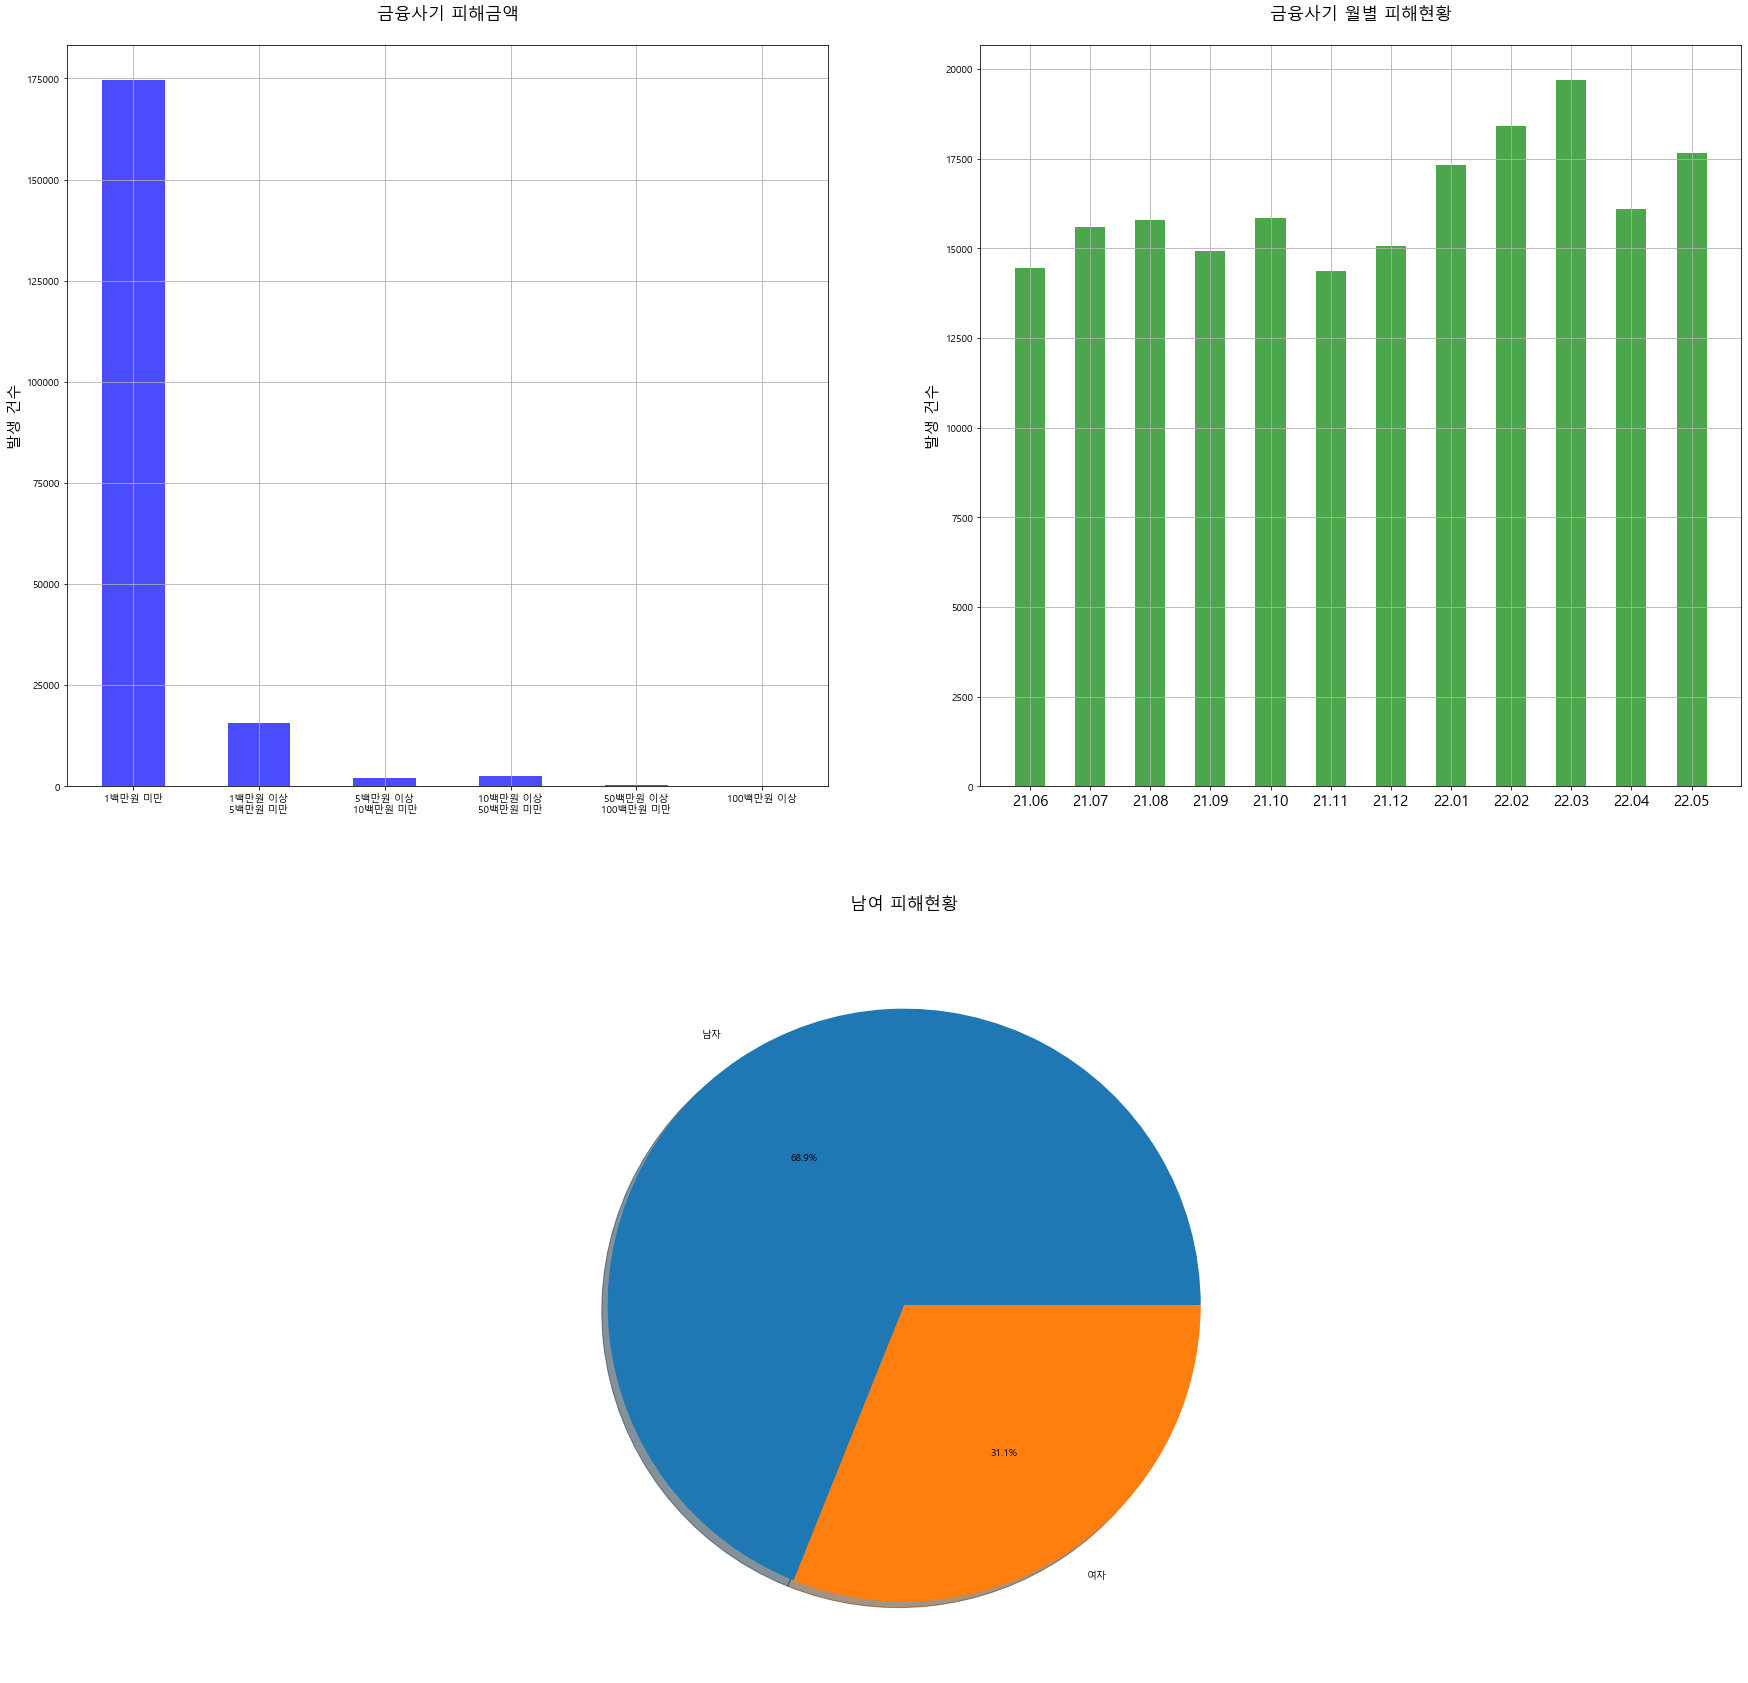

In [113]:
plt.figure(figsize=(30, 30))

plt.subplot(221)
draw_barplot('money')

plt.subplot(212)
draw_pieplot('sex')

plt.subplot(222)
draw_barplot('month')

In [ ]:
# http://m.wooriy.com/news/articleView.html?idxno=6633 메신저사기, 1백만원이하 피해예방 기사